In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 39.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 54.5 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=0fcb8b42bb3b29b4fee608cae2bffc31f18072530a6030580c087b148364cc18
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.8 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=203284b09d7fca30717dddcccd49d8f954a1f38bdecdd5e0d140bb456f829662
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=2380c35c3ed94d847b1f8cd2505dd36dd8f355f24c24e9

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.8 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [5]:
book = "SOMEWT"
startdate = 1600
enddate = 2023
wikilink = "https://en.wikipedia.org/wiki/Mahatma_Gandhi"
titlename = "Mahatma_Gandhi"

In [6]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [7]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [9]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

24
1/chapter1


2023-04-10 09:59:24,587 - KeyphraseVectorizer - INFO - It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
INFO:KeyphraseVectorizer:It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1/chapter2
1/chapter3
1/chapter4
1/chapter5
1/chapter6
1/chapter7
1/chapter8
1/chapter9
1/chapter10
1/chapter11
1/chapter12
1/chapter13
1/chapter14
1/chapter15
1/chapter16
1/chapter17
1/chapter18
1/chapter19
1/chapter20
1/chapter21
1/chapter22
1/chapter23
1/chapter24
29
2/chapter1
2/chapter2
2/chapter3
2/chapter4
2/chapter5
2/chapter6
2/chapter7
2/chapter8
2/chapter9
2/chapter10
2/chapter11
2/chapter12
2/chapter13
2/chapter14
2/chapter15
2/chapter16
2/chapter17
2/chapter18
2/chapter19
2/chapter20
2/chapter21
2/chapter22
2/chapter23
2/chapter24
2/chapter25
2/chapter26
2/chapter27
2/chapter28
2/chapter29
23
3/chapter1
3/chapter2
3/chapter3
3/chapter4
3/chapter5
3/chapter6
3/chapter7
3/chapter8
3/chapter9
3/chapter10
3/chapter11
3/chapter12
3/chapter13
3/chapter14
3/chapter15
3/chapter16
3/chapter17
3/chapter18
3/chapter19
3/chapter20
3/chapter21
3/chapter22
3/chapter23
47
4/chapter1
4/chapter2
4/chapter3
4/chapter4
4/chapter5
4/chapter6
4/chapter7
4/chapter8
4/chapter9
4/chapter10
4/chap

In [10]:
mp_bert

{'1/chapter1': [('karamchand gandhi', 0.5948),
  ('uttamchand gandhi', 0.5779),
  ('alias ota gandhi', 0.5671),
  ('kaba gandhi', 0.5582),
  ('ota gandhi', 0.5494)],
 '1/chapter2': [('rajasthanik court', 0.3858),
  ('educational inspector', 0.3332),
  ('examination', 0.3111),
  ('incident', 0.3097),
  ('student', 0.2955)],
 '1/chapter3': [('betrothal', 0.3771),
  ('marriage', 0.3549),
  ('marriage processions', 0.3356),
  ('wedding', 0.3153),
  ('kathiawad', 0.313)],
 '1/chapter4': [('faithfulness', 0.4946),
  ('fidelity', 0.3835),
  ('marriage', 0.3158),
  ('lust', 0.2803),
  ('faithless', 0.2704)],
 '1/chapter5': [('scholarships', 0.416),
  ('hindu society', 0.3783),
  ('hindu boy', 0.3586),
  ('education', 0.3428),
  ('marriage', 0.3149)],
 '1/chapter6': [('friendships', 0.4218),
  ('friendship', 0.3971),
  ('friends', 0.3025),
  ('virtues', 0.2941),
  ('virtue', 0.2894)],
 '1/chapter7': [('smoking stumps', 0.4989),
  ('cigarettes', 0.4873),
  ('cigarette', 0.452),
  ('smoking', 0.4

In [11]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [12]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
13
15
14
12
13
12
15
14
15
15
15
15
15
15
14
15
15
15
15
15
15
14
15
14
15
14
14
15
15
15
15
15
14
15
15
15
15
15
15
15
15
14
15
14
12
15
15
14
14
15
15
14
15
14
14
13
13
15
11
14
15
15
15
15
15
15
15
15
15
15
12
14
15
15
15
14
14
14
15
11
14
15
15
15
14
15
14
14
13
14
15
15
15
15
15
15
14
14
14
15
15
15
13
14
14
15
15
12
14
15
13
15
15
14
15
15
15
15
14
15
14
15
15
15
15
14
13
15
14
15
15
14
14
15
15
15
15
15
13
15
15
15
14
15
15
14
15
14
15
13
15
15
15
13
15
15
15
15
15
14
14
15
15
15
15


In [13]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'caste dinner', 'liberty', 'insults', 'hindu society', 'asiatic department', 'Matheran', 'returning to India', 'Narayan', 'engine', 'beautiful manifestations', 'outward himsa', 'African experiences', 'kaba gandhi', 'penitent parsi rustomji', 'life', 'compared incidentally', 'jalianwala bagh memorial', 'Eiffel Tower', 'unnecessary provocation', 'brahmachari', 'permanent funds', 'barristers', 'divine poem', 'wishing to return', 'vegetarianism independently', 'stinking and reeking', 'smallpox', 'religions', 'return', 'vegetarian restaurants', 'knew Maulana Mazharul', 'campaign', 'transvaal bar', 'veteran Congress leaders', 'shyness', 'prayed to God', 'desire', 'kevalram mavji', 'enthusiasm', 'peace celebrations', 'wealth and live', 'add salt', 'village', 'embarrassing attentions', 'session', 'cursorily mentioned', 'addressed letter', 'letter', 'sheth haji muhammad', 'vegetarian fame', 'thakkar bapa', 'possessing certificate', 'proper and pleasing', 'Musalman boys Urdu', 'live as simply',

In [15]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Bania_Caste_1869': ['1/chapter1'], 'Alias_Ota_Gandhi_1869': ['1/chapter1'], 'Childhood_1869': ['1/chapter1'], 'Childhood_1887': ['1/chapter8'], 'Childhood_1911': ['4/chapter34'], 'Grandfather_1869': ['1/chapter1'], 'Ota_Gandhi_1869': ['1/chapter1'], 'Apparent_Discourtesy_1869': ['1/chapter1'], 'Multiplication_Tables_1869': ['1/chapter1'], 'Gandhi_1896': ['2/chapter27'], 'Gandhi_1897': ['3/chapter3'], 'Gandhi_1901': ['3/chapter13', '3/chapter16'], 'Gandhi_1917': ['5/chapter39'], 'Kaba_Gandhi_1869': ['1/chapter1'], 'Uttamchand_Gandhi_1869': ['1/chapter1'], 'Karamchand_Gandhi_1869': ['1/chapter1'], 'Outstanding_Impression_1869': ['1/chapter1'], 'Literally_Believed_1869': ['1/chapter2'], 'Harishchandra_1869': ['1/chapter2'], 'Porbandar_For_Rajkot_1869': ['1/chapter2'], 'Incidents_Belonging_1869': ['1/chapter2'], 'Rajasthanik_Court_1869': ['1/chapter2'], 'Indelible_Impression_1869': ['1/chapter2'], 'Incident_Connected_1869': ['1/chapter2'], 'Examination_1869': 

In [16]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [17]:
key_yr_chap_mp

defaultdict(list,
            {'Bania_Caste_1869': ['1/chapter1'],
             'Alias_Ota_Gandhi_1869': ['1/chapter1'],
             'Childhood_1869': ['1/chapter1'],
             'Childhood_1887': ['1/chapter8'],
             'Childhood_1911': ['4/chapter34'],
             'Grandfather_1869': ['1/chapter1'],
             'Ota_Gandhi_1869': ['1/chapter1'],
             'Apparent_Discourtesy_1869': ['1/chapter1'],
             'Multiplication_Tables_1869': ['1/chapter1'],
             'Gandhi_1896': ['2/chapter27'],
             'Gandhi_1897': ['3/chapter3'],
             'Gandhi_1901': ['3/chapter13', '3/chapter16'],
             'Gandhi_1917': ['5/chapter39'],
             'Kaba_Gandhi_1869': ['1/chapter1'],
             'Uttamchand_Gandhi_1869': ['1/chapter1'],
             'Karamchand_Gandhi_1869': ['1/chapter1'],
             'Outstanding_Impression_1869': ['1/chapter1'],
             'Literally_Believed_1869': ['1/chapter2'],
             'Harishchandra_1869': ['1/chapter2'],
   

In [18]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Bania_Caste_1869
Alias_Ota_Gandhi_1869
Childhood_1869
Childhood_1887
Childhood_1911
Grandfather_1869
Ota_Gandhi_1869
Apparent_Discourtesy_1869
Multiplication_Tables_1869
Gandhi_1896
Gandhi_1897
Gandhi_1901
Gandhi_1917
Kaba_Gandhi_1869
Uttamchand_Gandhi_1869
Karamchand_Gandhi_1869
Outstanding_Impression_1869
Literally_Believed_1869
Harishchandra_1869
Porbandar_For_Rajkot_1869
Incidents_Belonging_1869
Rajasthanik_Court_1869
Indelible_Impression_1869
Incident_Connected_1869
Examination_1869
Examination_1891
Bear_To_Talk_1869
Incident_1869
Incident_1924
School_1869
Teacher_1869
Teacher_1914
Student_1869
Educational_Inspector_1869
Betrothal_1869
Proper_And_Pleasing_1869
Parents_1869
Wedding_1869
Kathiawad_1869
Kathiawad_1893
Father_1869
Father_1887
Father_1893
Marriage_1869
Marriage_1890
Marriage_1896
Marriage_1906
Time_1869
Time_1887
Time_1915
Considerations_Triple_1869
Preliminary_Promise_1869
Coaching_Superfluous_1869
Preparations_1869
Marriage_Processions_1869
Costing_A_Pice_1869
Fideli

In [19]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [20]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Biography', 'Early_life_and_background', 'Three_years_in_London', 'Student_of_law', 'Vegetarianism_and_committee_work', 'Called_to_the_bar', 'Civil_rights_activist_in_South_Africa_(1893–1914)', 'Europeans,_Indians_and_Africans', 'Struggle_for_Indian_independence_(1915–1947)', 'Role_in_World_War_I', 'Champaran_agitations', 'Kheda_agitations', 'Khilafat_movement', 'Non-co-operation', 'Salt_Satyagraha_(Salt_March)', 'Gandhi_as_folk_hero', 'Negotiations', 'Round_Table_Conferences', 'Congress_politics', 'World_War_II_and_Quit_India_movement', 'Partition_and_independence', 'Death', 'Funeral_and_memorials', 'Principles,_practices,_and_beliefs', 'Influences', 'Leo_Tolstoy', 'Shrimad_Rajchandra', 'Religious_texts', 'Sufism', 'On_wars_and_nonviolence', 'Wars', 'Truth_and_Satyagraha', 'Nonviolence', 'On_inter-religious_relations', 'Buddhists,_Jains_and_Sikhs', 'Muslims', 'Christians', 'Jews', 'On_life,_society_and_other_application_of_his_ideas', 'Vegetarianism,_food,_and_animals', 'Fasting', '

In [21]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [22]:
mp_sim_score

{'Early_life_and_background->Bania_Caste_1869': tensor(0.6395, device='cuda:0'),
 'Early_life_and_background->Alias_Ota_Gandhi_1869': tensor(0.7394, device='cuda:0'),
 'Early_life_and_background->Childhood_1869': tensor(0.5570, device='cuda:0'),
 'Early_life_and_background->Childhood_1911': tensor(0.1717, device='cuda:0'),
 'Early_life_and_background->Grandfather_1869': tensor(0.5567, device='cuda:0'),
 'Early_life_and_background->Ota_Gandhi_1869': tensor(0.7310, device='cuda:0'),
 'Early_life_and_background->Multiplication_Tables_1869': tensor(0.0287, device='cuda:0'),
 'Early_life_and_background->Gandhi_1896': tensor(0.3043, device='cuda:0'),
 'Early_life_and_background->Gandhi_1897': tensor(0.3590, device='cuda:0'),
 'Early_life_and_background->Gandhi_1901': tensor(0.5365, device='cuda:0'),
 'Early_life_and_background->Gandhi_1917': tensor(0.5549, device='cuda:0'),
 'Early_life_and_background->Kaba_Gandhi_1869': tensor(0.7716, device='cuda:0'),
 'Early_life_and_background->Uttamchan

In [23]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [24]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [25]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [26]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

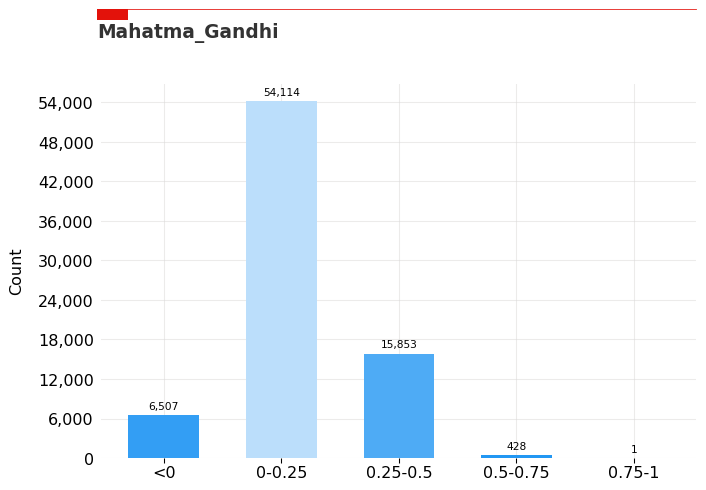

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [28]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Biography': -1, 'Early_life_and_background': 1885, 'Three_years_in_London': -1, 'Student_of_law': 1888, 'Vegetarianism_and_committee_work': 1901, 'Called_to_the_bar': 1893, 'Civil_rights_activist_in_South_Africa_(1893–1914)': 1897, 'Europeans,_Indians_and_Africans': 1908, 'Struggle_for_Indian_independence_(1915–1947)': 1930, 'Role_in_World_War_I': 1916, 'Champaran_agitations': 1917, 'Kheda_agitations': 1918, 'Khilafat_movement': 1919, 'Non-co-operation': 1919, 'Salt_Satyagraha_(Salt_March)': 1928, 'Gandhi_as_folk_hero': 1905, 'Negotiations': 1931, 'Round_Table_Conferences': 1931, 'Congress_politics': 1936, 'World_War_II_and_Quit_India_movement': 1944, 'Partition_and_independence': 1947, 'Death': 1948, 'Funeral_and_memorials': 1948, 'Principles,_practices,_and_beliefs': -1, 'Influences': 1892, 'Leo_Tolstoy': 1909, 'Shrimad_Rajchandra': 1930, 'Religious_texts': 1930, 'Sufism': -1, 'On_wars_and_nonviolence': -1, 'Wars': 1918, 'Truth_and_Satyagraha': 1932, 'Nonviolence': 1943, 'On_inter-

In [29]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [30]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


789


In [31]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Early_life_and_background   ->  309
Student_of_law   ->  362
Vegetarianism_and_committee_work   ->  229
Called_to_the_bar   ->  354
Civil_rights_activist_in_South_Africa_(1893–1914)   ->  303
Europeans,_Indians_and_Africans   ->  202
Struggle_for_Indian_independence_(1915–1947)   ->  150
Role_in_World_War_I   ->  122
Champaran_agitations   ->  190
Kheda_agitations   ->  195
Khilafat_movement   ->  245
Non-co-operation   ->  329
Salt_Satyagraha_(Salt_March)   ->  194
Gandhi_as_folk_hero   ->  268
Negotiations   ->  206
Round_Table_Conferences   ->  269
Congress_politics   ->  144
World_War_II_and_Quit_India_movement   ->  152
Partition_and_independence   ->  206
Death   ->  222
Funeral_and_memorials   ->  111
Principles,_practices,_and_beliefs   ->  161
Influences   ->  252
Leo_Tolstoy   ->  209
Shrimad_Rajchandra   ->  280
Religious_texts   ->  173
Sufism   ->  203
Wars   ->  182
Truth_and_Satyagraha   ->  145
Nonviolence   ->  222
Buddhists,_Jains_and_Sikhs   ->  133
Muslims   ->  190

In [32]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [33]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Early_life_and_background  ->   ['Johannesburg_1885', 'Kaba_Gandhi_1869', 'Alias_Ota_Gandhi_1869', 'Ota_Gandhi_1869', 'Uttamchand_Gandhi_1869']
Student_of_law  ->   ['Voyage_1887', 'Hinduism_1887', 'Indian_Ocean_1887', 'Returned_To_Rajkot_1887', 'Rajkot_To_Resume_1887']
Vegetarianism_and_committee_work  ->   ['Gandhi_1901', 'Gokhale_1901', 'Sir_Pherozeshah_Mehta_1901', 'Sir_Pherozeshah_1901', 'India_Club_1901']
Called_to_the_bar  ->   ['Barristers_1893', 'Indian_Law_1893', 'Virchand_Gandhi_1893', 'Study_Of_Indian_1893', 'Englishmen_And_Boers_1893']
Civil_rights_activist_in_South_Africa_(1893–1914)  ->   ['Gandhi_1897', 'South_African_Ports_1897', 'Natal_Indian_Congress_1897', 'South_Africa_1897', 'Relief_From_War-Duty_1897']
Europeans,_Indians_and_Africans  ->   ['Plague_1904', 'South_Africa_1914', 'Natal_Legislative_Assembly_1893', 'Coloured_People_1885', 'Sudden_Outbreak_1914']
Struggle_for_Indian_independence_(1915–1947)  ->   ['Constitution_1917', 'Veteran_Congress_Leaders_1921', '

In [34]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [35]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [36]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [37]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Admission', 'Sahib', 'Gokhale', 'Bombay', 'South Africa', 'Abdulla Sheth', 'Meat', 'Natal Indian Congress', 'Vegetarian Restaurant', 'Servant', 'Teachers', 'Indian Opinion', 'Ashram', 'Gandhi', 'Indians', 'Natal', 'Speech', 'Boer War', 'Class Passengers', 'Punjab Government', 'Satyagraha Struggle', 'Passenger', 'Plague', 'Religions', 'Satyagraha Ashram', 'Hindu', 'Swami Shraddhanandji', 'Caste', 'Diet', 'Dada Abdulla', 'Punjab', 'Ahmedabad', 'Indian', 'Johannesburg', 'Barrister', 'Boer', 'Kathiawad', 'Rebellion', 'Marriage', 'Railway Authorities', 'Shankarlal Parikh', 'Zulu', 'Congress', 'Dietetics', 'Mohanlal Pandya', 'Hindus', 'Prayer', 'Vegetarianism', 'Rajkot', 'Christian Indians', 'Tamil', 'Zulus', 'Fasting', 'Brahmacharya', 'Milk', 'Polak', 'Satyagraha', 'Education', 'Religion', 'Hinduism', 'Brahmacharya Vow', 'Coloured People', 'Champaran']
63
{'Early_life_and_background': 1, 'Student_of_law': 0, 'Vegetarianism_and_committee_work': 1, 'Called_to_the_bar': 0, 'Civil_rights_acti

In [38]:
print(sum(list(mp2.values())))

42


In [39]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Early_life_and_background': set(), 'Student_of_law': set(), 'Vegetarianism_and_committee_work': set(), 'Called_to_the_bar': set(), 'Civil_rights_activist_in_South_Africa_(1893–1914)': {'Natal_Indian_Congress'}, 'Europeans,_Indians_and_Africans': set(), 'Struggle_for_Indian_independence_(1915–1947)': set(), 'Role_in_World_War_I': set(), 'Champaran_agitations': set(), 'Kheda_agitations': {'Kheda'}, 'Khilafat_movement': set(), 'Non-co-operation': set(), 'Salt_Satyagraha_(Salt_March)': set(), 'Gandhi_as_folk_hero': set(), 'Negotiations': set(), 'Round_Table_Conferences': set(), 'Congress_politics': set(), 'Death': set(), 'Principles,_practices,_and_beliefs': set(), 'Influences': {'Hindu'}, 'Leo_Tolstoy': {'Tolstoy_Farm'}, 'Shrimad_Rajchandra': set(), 'Religious_texts': set(), 'Sufism': set(), 'Wars': set(), 'Nonviolence': set(), 'Muslims': set(), 'Christians': {'Jesus'}, 'Vegetarianism,_food,_and_animals': set(), 'Fasting': {'Fasting'}, 'Women': set(), 'Brahmacharya:_abstinence_from_sex_

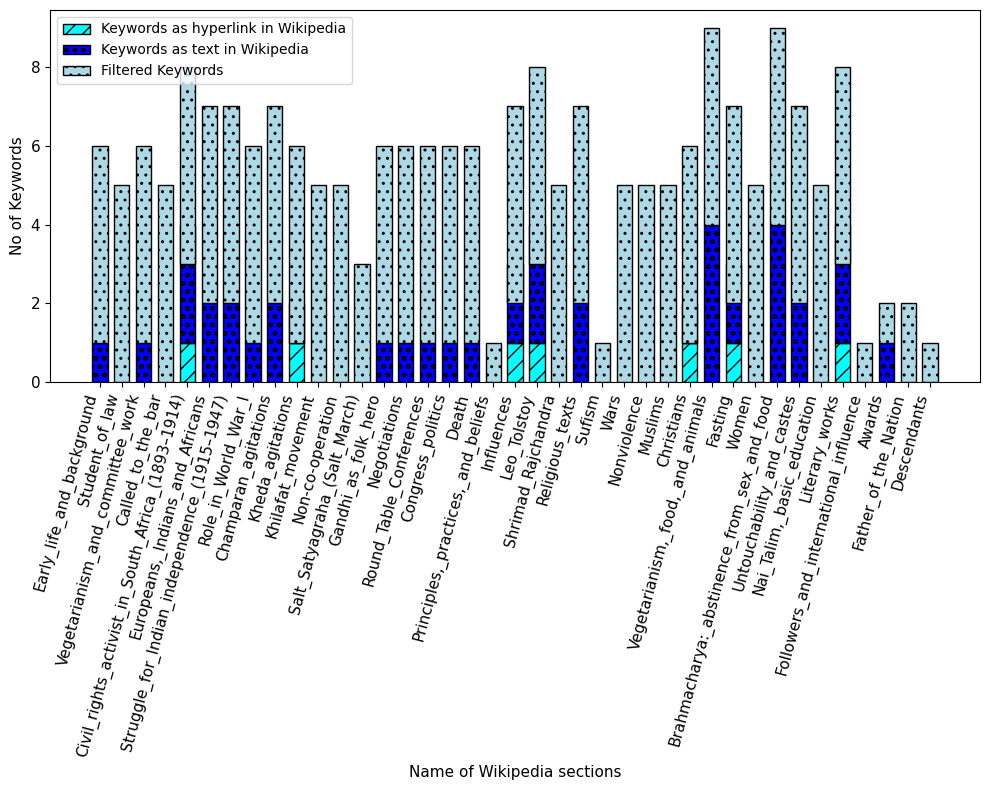

In [40]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [41]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Sudden_Outbreak', 'Sheth', 'Hindu_Boy', 'Babu_Bhupendranath_Basu', 'Muslim_Demand', 'Rajkot_To_Resume', 'Passive_Resistance', 'Called_In_Gujarati', 'Abdulla_Sheth', 'Literary_Education', 'Brahmacharya', 'Autobiography', 'Virchand_Gandhi', 'Gujarati_Dhedvado', 'Indigo', 'Anthem', 'Brahmachari', 'Shankarlal_Parikh', 'Vegetarian_Society', 'Sir_Pherozeshah_Mehta', 'Khilafat_Conference', 'Dietetic_Restrictions', 'Pulseless_Diet', 'Hindu', 'Writings', 'Loyalty', 'Plague', 'Speech', 'Swami_Vivekananda', 'Hindu_Husband', 'Unconsciously_Committing', 'Natal_Legislative_Assembly', 'Translation1_Published', 'Satyagrahi', 'Woven_Cloth', 'Basu', 'Enterprising_Youths', 'Leaders', 'Training_On_Tolstoy', 'Late_Babu_Bhupendranath', 'Chapters', 'Vocational_Training', 'Translations', 'Constitution', 'Rendering_Humanitarian', 'Gandhi', 'Champaran_Tenant', 'Granted_Suspension', 'Revenue_Assessment', 'Congress_Resolutions', 'Calcutta_Special', 'Congress', 'Attend', 'Milk', 'Kheda', 'Volunteers', 'Committee

In [42]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

3800
{'Special:BookSources/978-0-385-53230-3', 'Vegan_chicken_fillet_roll', 'Flora_family', 'Sentientism', 'Special:BookSources/978-0-87220-330-3', 'Abhishek_Singhvi', 'Gilbert_Elliot-Murray-Kynynmound,_1st_Earl_of_Minto', 'Jon_Wynne-Tyson', 'Category:19th-century_South_African_lawyers', 'Category:Articles_with_NLA_identifiers', '1915_Singapore_Mutiny', 'Political_prisoner', 'Gidon_Eshel', 'Gopal_Krishna_Gokhale', 'File:Gandhi_fasting_1948.jpg', 'Vinayak_Damodar_Savarkar', 'History_of_India_(1947%E2%80%93present)', 'Lacto_vegetarianism', 'Libertarianism', 'Rowlatt_Act', 'File:Gandhi_Kheda_1918.jpg', 'Category:Articles_with_Internet_Archive_links', 'Martin_Buber', 'Category:19th-century_Indian_writers', 'Category:Indian_memoirists', 'Alluri_Sitarama_Raju', 'Low-technology', 'Swami_Vipulananda', 'Devanagari', 'Economic_vegetarianism', 'Maharishi_Mahesh_Yogi', 'Elizabeth_II', 'Special:BookSources/978-81-86030-25-7', 'International_Vegetarian_Union', 'Self-Realization_Fellowship', 'Donald_

In [43]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'Brahmacharya', 'Kheda', 'South_Africa', 'Vegetarian_Society', 'Mohanlal_Pandya', 'Harishchandra', 'Hindu', 'Tolstoy', 'Satyagraha', 'Indian_Opinion', 'Swami_Vivekananda', 'Hinduism', 'Fasting', 'Gujarat', 'Natal_Indian_Congress', 'Johannesburg', 'Tolstoy_Farm', 'Vegetarianism', 'Jesus'}


19

In [44]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'School_Education_1897', 'Ota_Gandhi_1869', 'Congress_Constitution_1920', 'Education_1912', 'Khilafat_Conference_1920', 'Dignity_1896', 'Sir_Charles_Bruce_1901', 'Reforms_1917', 'Jaipur_And_Palanpur_1918', 'Fasting_1912', 'Congress_Machinery_1917', 'Granted_Suspension_1919', 'Speech_1897', 'Vow_1906', 'Anthem_1896', 'Musalman_1919', 'Jesus_1893', 'Hinduism_1887', 'Hindu_Youngsters_1912', 'Brahmacharya_1912', 'Gujarati_Dhedvado_1914', 'Untouchables_1914', 'Translations_1893', 'Calcutta_Special_1920', 'Chhaganlal_Gandhi_1904', 'Indigo_Plantations_1917', 'South_Africa_1897', 'Attended_1919', 'Habits_Idiosyncrasies_1918', 'Committee_Suggested_1893', 'Unconsciously_Committing_1914', 'Unbounded_Enthusiasm_1894', 'Revenue_Assessment_1919', 'Swami_Vivekananda_1893', 'Babu_Bhupendranath_Basu_1915', 'Odds_Indian_Opinion_1904', 'Abdulla_Sheth_1924', 'Alias_Ota_Gandhi_1869', 'Woven_Cloth_1917', 'Kheda_1919', 'Hindu_Husband_1897', 'Satyagrahi_1919', 'Translation1_Published_1906', 'Experiments_1906

In [45]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Alias_Ota_Gandhi_1869': ['1/chapter1'], 'Ota_Gandhi_1869': ['1/chapter1'], 'Gandhi_1897': ['3/chapter3'], 'Gandhi_1901': ['3/chapter13', '3/chapter16'], 'Gandhi_1917': ['5/chapter39'], 'Kaba_Gandhi_1869': ['1/chapter1'], 'Uttamchand_Gandhi_1869': ['1/chapter1'], 'Harishchandra_1869': ['1/chapter2'], 'Teacher_1869': ['1/chapter2', '1/chapter5'], 'Education_1912': ['4/chapter32'], 'Hindu_Boy_1869': ['1/chapter5'], 'Hindu_Society_1869': ['1/chapter5'], 'Hinduism_1887': ['1/chapter9'], 'Hinduism_1893': ['4/chapter5'], 'Matriculation_Examination_1887': ['1/chapter10'], 'Voyage_1887': ['1/chapter11'], 'Rajkot_To_Resume_1887': ['1/chapter11'], 'Sheth_1924': ['2/chapter8', '2/chapter9'], 'Indian_Ocean_1887': ['1/chapter11'], 'Returned_To_Rajkot_1887': ['1/chapter11'], 'Vow_1906': ['3/chapter7', '3/chapter8', '4/chapter25'], 'Vegetarianism_1890': ['1/chapter16', '1/chapter17'], 'Vegetarian_1890': ['1/chapter17'], 'Diet_1919': ['5/chapter28'], 'Experiments_1906': ['4/chapter26'], 'Vegetarian_D

In [46]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['school education', 'ota gandhi', 'congress constitution', 'education', 'khilafat conference', 'dignity', 'sir charles bruce', 'reforms', 'jaipur and palanpur', 'fasting', 'congress machinery', 'granted suspension', 'speech', 'vow', 'anthem', 'musalman', 'jesus', 'hinduism', 'hindu youngsters', 'brahmacharya', 'gujarati dhedvado', 'untouchables', 'translations', 'calcutta special', 'chhaganlal gandhi', 'indigo plantations', 'south africa', 'attended', 'habits idiosyncrasies', 'committee suggested', 'unconsciously committing', 'unbounded enthusiasm', 'revenue assessment', 'swami vivekananda', 'babu bhupendranath basu', 'odds indian opinion', 'abdulla sheth', 'alias ota gandhi', 'woven cloth', 'kheda', 'hindu husband', 'satyagrahi', 'translation1 published', 'experiments', 'shankarlal parikh', 'volunteers concentrated', 'voyage', 'uttamchand gandhi', 'congress', 'punjab situation', 'autobiography', 'south africa', 'sir pherozeshah', 'sir pherozeshah mehta', 'relief from war-duty', 'ashr

In [47]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

62
170
0.36470588235294116
